# Automatic Labeling

Let's explore some ways to automate labeling of articles. Manual labeling is both inaccurate and prone to human bias/error. 

Idea 1: Use price change as the measure of impact of articles

Please do:
2) Read/refactor code from "Fall2018Team1" and "Fall2018Team2" to import their/our data into the ipython notebook
3) Use K-Mean technique to try to classify articles into neutral/positive/negative impacts on the price
4) Data points for each article: 
1. The difference in price between the date of publish and t days later (you define t or look at last semester's code to see what works best for them, pretty sure they already did some work on this)
2. Number of words saying price up or down
3. Publisher
4. Timing
5. etc. find some features that you think is helpful!
5). Run K-Mean (you choose k) on the data and after it is done see if the machine learn to cluster articles that are neutral together, positive together, or negative together


## Understanding the dataset

First we wanted to load in the dataset, and understand some of the features and dimensions that we were working in. To do so, we analyzed some of the dataframes, checked for null values, found some statistical descriptions, and plotted some of the features as they relate to each other.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# load data --> dataframe
data = pd.read_csv("news_score.1csv.csv")
data.head()

,author,contents,description,publisher,source_url,title,date,time,Open,High,...,Average,Volatility,SD,publisherLabel,Mark,publisher_L,author_L,score_sentiment,magnitude_sentiment,tfidf
0,Bitcoinist.net,real time prices vires numeris bitcoin ethereu...,israel finance ministry bank israel considerin...,Bitcoinist.com,http://bitcoinist.com/kosher-crypto-bitcoen-se...,Kosher Crypto BitCoen Is Setting a Course for ...,2/2/18,0:00:08,8547.864403,8562.224306,...,12603.49354,433909.3344,2087.647258,96.0,0.0,3.0,-1.0,0.4,0.4,0.31545
1,Michelle Fox,var postloadfunctions var foresee enabled var ...,bitcoin may still drop rally back year early b...,CNBC,https://www.cnbc.com/2018/02/01/bitcoin-near-b...,"Bitcoin near bottom, will rally to $20,000 thi...",2/2/18,0:02:00,8547.864403,8562.224306,...,12603.49354,433909.3344,2087.647258,146.0,0.0,3.0,0.0,0.1,0.1,0.49858
2,Scott Scanlon,core cryptocurrency networks miners people use...,core cryptocurrency networks miners people use...,Youbrandinc.com,https://www.youbrandinc.com/crytocurrency/brai...,Brain Genius Submerges His Bitcoin Mining Rig ...,2/2/18,0:03:08,8547.864403,8562.224306,...,12603.49354,433909.3344,2087.647258,1181.0,0.0,-1.0,-1.0,0.4,0.4,0.31795
3,Bruce Kleinman,demons digital gold part already done please r...,demons digital gold part,Hackernoon.com,https://hackernoon.com/remediation-wherefore-a...,"Remediation, wherefore art thou?",2/2/18,0:18:34,8547.864403,8562.224306,...,12603.49354,433909.3344,2087.647258,452.0,0.0,3.0,0.0,0.2,0.2,0.97540
4,Jason Murphy,email password remember feb systems underpinni...,systems underpinning bitcoin truly revolutiona...,Crikey.com.au,https://www.crikey.com.au/2018/02/02/cryptotra...,Cryptotragedy: what if bitcoin’s greatest stre...,2/2/18,0:25:09,8547.864403,8562.224306,...,12603.49354,433909.3344,2087.647258,220.0,0.0,0.0,0.0,0.8,0.8,0.33696


In [8]:
# check for null values
data.isnull().sum()

author                 0
contents               0
description            0
publisher              0
source_url             0
title                  0
date                   0
time                   0
Open                   0
High                   0
Low                    0
Close                  0
Volume_(BTC)           0
Volume_(Currency)      0
Weighted_Price         0
Average                0
Volatility             0
SD                     0
publisherLabel         0
Mark                   0
publisher_L            0
author_L               0
score_sentiment        0
magnitude_sentiment    0
tfidf                  0
dtype: int64

In [10]:
data.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Average,Volatility,SD,publisherLabel,Mark,publisher_L,author_L,score_sentiment,magnitude_sentiment,tfidf
count,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000
mean,8182.139135,8190.604925,8173.207231,8182.071572,25.751414,199728.969814,8181.904584,10701.182909,293362.833360,1411.442590,615.735753,-0.175787,1.412815,0.465126,0.053884,0.375801,0.407626
std,682.239671,678.133716,686.505293,682.132607,16.902330,110347.430735,682.283876,894.026932,116731.998826,561.627091,378.364278,0.529577,1.579945,1.260539,0.481763,0.273717,0.186565
min,6806.927451,6826.417535,6786.712438,6807.273597,9.265880,74305.946820,6806.651598,9786.788157,180619.004500,869.003591,0.000000,-1.000000,-1.000000,-1.000000,-2.000000,-2.000000,0.157630
25%,7905.440896,7917.342931,7892.443951,7905.416028,13.935292,121295.129200,7904.972491,10090.346930,192710.683500,927.179708,202.000000,0.000000,0.000000,-1.000000,-0.300000,0.200000,0.281280
50%,8310.115639,8313.456646,8306.793611,8310.097187,18.984345,154043.483800,8310.129580,10130.017600,231620.464900,1114.384481,643.000000,0.000000,2.000000,0.000000,0.000000,0.300000,0.329700
75%,8617.131229,8620.755771,8613.696326,8617.348722,35.615632,297975.902000,8617.210484,11592.976650,437801.267600,2106.372331,967.000000,0.000000,3.000000,1.000000,0.400000,0.600000,0.491838
max,9435.828417,9441.771257,9429.061993,9435.448514,63.421083,432929.362400,9435.411315,12603.493540,452638.412200,2177.757576,1186.000000,1.000000,3.000000,3.000000,0.900000,0.900000,1.633640


In [50]:
# right now only concerned about numerical values for k-means generation

data = data.select_dtypes(include=['int', 'float64'])
data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Average,Volatility,SD,publisherLabel,Mark,publisher_L,author_L,score_sentiment,magnitude_sentiment,tfidf
0,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042,12603.49354,433909.3344,2087.647258,96.0,0.0,3.0,-1.0,0.4,0.4,0.31545
1,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042,12603.49354,433909.3344,2087.647258,146.0,0.0,3.0,0.0,0.1,0.1,0.49858
2,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042,12603.49354,433909.3344,2087.647258,1181.0,0.0,-1.0,-1.0,0.4,0.4,0.31795
3,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042,12603.49354,433909.3344,2087.647258,452.0,0.0,3.0,0.0,0.2,0.2,0.97540
4,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042,12603.49354,433909.3344,2087.647258,220.0,0.0,0.0,0.0,0.8,0.8,0.33696


In [ ]:
We notice some interesting trends where high 

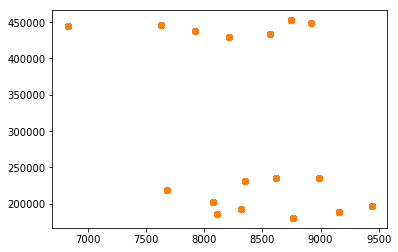

In [39]:
# plot the data to see what it looks like

plt.scatter(data["High"], data["Volatility"], alpha = 0.3)
plt.show()

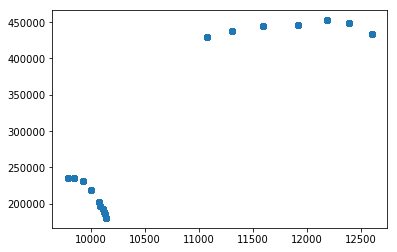

In [40]:
plt.scatter(data["Average"], data["Volatility"], alpha = 0.3)
plt.show()

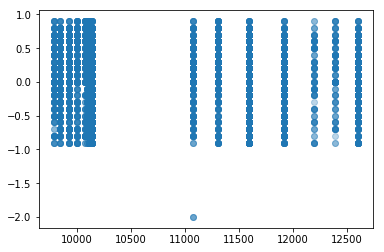

In [45]:
plt.scatter(data["Average"], data["score_sentiment"], alpha=0.3)
plt.show()

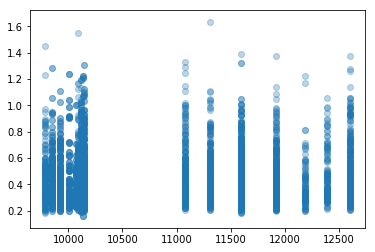

In [46]:
plt.scatter(data["Average"], data["tfidf"], alpha=0.3)
plt.show()

## K-Means Classification

We construct a classifier that only considers the integer / float columns of the dataframe, and runs k-means to classify the data into 3 groups. From these 3 groups, we can group them into expected price increase, expected price decrease, and no expected price change.

In [78]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

First we construct a y-value based on the price change of the day. If the price change is less than $0.10, we consider it negligible.

In [72]:
price_change = data['Close'] - data['Open']
price_change = price_change.map(lambda x: 0 if abs(x) > 0.1 else np.sign(x))
print(np.where(price_change == -1))
print(np.where(price_change == 0))
print(np.where(price_change == 1))

(array([2024, 2025, 2026, ..., 7051, 7052, 7053]),)
(array([   0,    1,    2, ..., 6813, 6814, 6815]),)
(array([2949, 2950, 2951, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959,
       2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967, 2968, 2969, 2970,
       2971, 2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2981,
       2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992,
       2993, 2994, 2995, 2996, 2997, 2998, 2999, 3000, 3001, 3002, 3003,
       3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014,
       3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025,
       3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036,
       3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047,
       3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058,
       3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069,
       3070, 3071, 3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3080,
       3081, 3082, 

In [73]:
data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Average,Volatility,SD,publisherLabel,Mark,publisher_L,author_L,score_sentiment,magnitude_sentiment,tfidf
0,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042,12603.49354,433909.3344,2087.647258,96.0,0.0,3.0,-1.0,0.4,0.4,0.31545
1,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042,12603.49354,433909.3344,2087.647258,146.0,0.0,3.0,0.0,0.1,0.1,0.49858
2,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042,12603.49354,433909.3344,2087.647258,1181.0,0.0,-1.0,-1.0,0.4,0.4,0.31795
3,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042,12603.49354,433909.3344,2087.647258,452.0,0.0,3.0,0.0,0.2,0.2,0.97540
4,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042,12603.49354,433909.3344,2087.647258,220.0,0.0,0.0,0.0,0.8,0.8,0.33696


Here we split our data into training and validation sets, allocating 20% of our data to validation.

In [79]:
X_train, X_validation, Y_train, Y_validation = train_test_split(data, price_change, test_size = 0.2, random_state = 42)

Now we run K-means clustering for 3 clusters (positive price change, negative price change, no price change), with a tolerance level of 0.1

In [87]:
kmeans = KMeans(n_clusters=3, tol = 0.1, random_state=0).fit(X_train)
print(np.where(kmeans.labels_ == 0)[:10])
print(np.where(kmeans.labels_ == 1)[:10])
print(np.where(kmeans.labels_ == 2)[:10])

(array([   0,    2,    3, ..., 5639, 5640, 5641]),)
(array([   1,    5,    7, ..., 5626, 5634, 5642]),)
(array([   4,   10,   14,   16,   18,   29,   41,   61,   67,   78,  108,
        119,  134,  144,  155,  159,  161,  163,  167,  172,  185,  190,
        191,  200,  208,  212,  215,  221,  222,  238,  243,  247,  260,
        275,  295,  302,  306,  315,  317,  319,  322,  334,  339,  360,
        372,  386,  391,  398,  415,  422,  431,  435,  468,  492,  497,
        505,  508,  510,  525,  526,  548,  551,  557,  560,  564,  565,
        573,  578,  588,  601,  607,  609,  610,  617,  625,  635,  639,
        648,  653,  654,  656,  664,  666,  673,  675,  679,  696,  705,
        706,  712,  717,  719,  721,  733,  736,  743,  759,  760,  769,
        792,  799,  807,  819,  826,  842,  847,  867,  870,  874,  882,
        884,  895,  901,  903,  905,  923,  943,  955,  957,  972,  985,
        993,  996,  999, 1007, 1015, 1023, 1025, 1028, 1041, 1051, 1063,
       1070, 1076, 

Below we have listed the median features of data in the predicted positive price change group, negatived price change group, and zero price group.

In [88]:
kmeans.cluster_centers_

array([[  8.47919408e+03,   8.48388885e+03,   8.47422870e+03,
          8.47913558e+03,   1.54835088e+01,   1.30156784e+05,
          8.47905796e+03,   1.00457292e+04,   2.02840850e+05,
          9.75918493e+02,   6.12595448e+02,  -1.77809388e-01,
          1.43385491e+00,   4.73115220e-01,   7.40256055e-02,
          4.07226177e-01,   3.99986344e-01],
       [  8.15262331e+03,   8.16477520e+03,   8.13963862e+03,
          8.15230895e+03,   3.18621865e+01,   2.52402360e+05,
          8.15215734e+03,   1.18556841e+04,   4.39195364e+05,
          2.11307968e+03,   6.11130496e+02,  -2.60283688e-01,
          1.38794326e+00,   4.00000000e-01,   3.85106394e-02,
          3.15815606e-01,   4.26833376e-01],
       [  6.80692745e+03,   6.82641753e+03,   6.78671244e+03,
          6.80727360e+03,   6.34210829e+01,   4.32929362e+05,
          6.80665160e+03,   1.15929767e+04,   4.44376688e+05,
          2.13800834e+03,   6.14651811e+02,   2.08166817e-15,
          1.46239554e+00,   5.51532033e-01

Our training accuracy is as shown below.

In [101]:
from sklearn.metrics import accuracy_score

In [137]:
Y_training_predictions = kmeans.predict(X_train)

# for each cluser, find count of labels 1, 0 , -1
# label cluster as max of count of labels

clusters = [0, 1, 2]

clusterA = np.where(Y_training_predictions == 0)
clusterB = np.where(Y_training_predictions == 1)
clusterC = np.where(Y_training_predictions == 2)

# C = no_Change
# A = up
# B = up

clusterA = clusterB

X_train.iloc[clusterA]
Y_train.iloc[clusterA]

# print(type(np.where(Y_train.iloc[clusterA] == -1)))
predict_down = np.where(Y_train.iloc[clusterA] == -1)[0]
predict_up = np.where(Y_train.iloc[clusterA] == 1)[0]
predict_zero = np.where(Y_train.iloc[clusterA] == 0)[0]

print([len(predict_down), len(predict_zero), len(predict_up)])
predicted_class = np.argmax([len(predict_down), len(predict_zero), len(predict_up)]) - 1
predicted_class


# accuracy_score(X_train)

[282, 1128, 0]


0

In [130]:
Y_training_predictions = kmeans.predict(X_train)

# for each cluser, find count of labels 1, 0 , -1
# label cluster as max of count of labels

group_number = [0, 1, 2]

for group_id in group_number:
    cluster = np.where(Y_training_predictions == group_id)

    X_train.iloc[cluster]
    Y_train.iloc[cluster]

    predict_down = np.where(Y_train.iloc[cluster] == -1)[0]
    predict_up = np.where(Y_train.iloc[cluster] == 1)[0]
    predict_zero = np.where(Y_train.iloc[cluster] == 0)[0]

    predicted_class = np.argmax([len(predict_down), len(predict_zero), len(predict_up)]) - 1
    predicted_string = lambda predicted_class: "up" if predicted_class == 1 else ("down" if predicted_class == -1 else "no change")
    print("KMeans Cluster " + str(cluster) + " is predicted " + predicted_string(predicted_class))


# accuracy_score(X_train)

KMeans Cluster (array([   0,    2,    3, ..., 5639, 5640, 5641]),) is predicted no change
KMeans Cluster (array([   1,    5,    7, ..., 5626, 5634, 5642]),) is predicted no change
KMeans Cluster (array([   4,   10,   14,   16,   18,   29,   41,   61,   67,   78,  108,
        119,  134,  144,  155,  159,  161,  163,  167,  172,  185,  190,
        191,  200,  208,  212,  215,  221,  222,  238,  243,  247,  260,
        275,  295,  302,  306,  315,  317,  319,  322,  334,  339,  360,
        372,  386,  391,  398,  415,  422,  431,  435,  468,  492,  497,
        505,  508,  510,  525,  526,  548,  551,  557,  560,  564,  565,
        573,  578,  588,  601,  607,  609,  610,  617,  625,  635,  639,
        648,  653,  654,  656,  664,  666,  673,  675,  679,  696,  705,
        706,  712,  717,  719,  721,  733,  736,  743,  759,  760,  769,
        792,  799,  807,  819,  826,  842,  847,  867,  870,  874,  882,
        884,  895,  901,  903,  905,  923,  943,  955,  957,  972,  985,
 

Our validation score is as shown below.

In [100]:
Y_validation_prediction = kmeans.predict(X_validation)
kmeans.score(X_validation)

-2560904540356.0879